In [1]:
from sympy import *
from IPython.display import display_latex, display
from sympy.parsing.latex import parse_latex
init_session()

from scipy import optimize

%matplotlib inline


IPython console for SymPy 1.8 (Python 3.6.13-64-bit) (ground types: gmpy)

These commands were executed:
>>> from __future__ import division
>>> from sympy import *
>>> x, y, z, t = symbols('x y z t')
>>> k, m, n = symbols('k m n', integer=True)
>>> f, g, h = symbols('f g h', cls=Function)
>>> init_printing()

Documentation can be found at https://docs.sympy.org/1.8/



In [2]:
def sistema_a_latex(sist, ltx=True) :
    """
    Convierte un sistema Sympy a código LaTeX. Por defecto las ecuaciones tienen que estar en latex. Si no ltx=False
    """
    sist_latex = r"$\left\{ \begin{matrix}"
    for e in sist:
        ee = e if ltx else latex(e)
        sist_latex += ee +r" \\ "  
    sist_latex += r"\end{matrix}\right.$"
    return(sist_latex)

In [3]:
def region_factible(sist_latex) :
    print("=============================================")
    print("Restricciones:")
    display_latex(sistema_a_latex(sist_latex), raw=True)
    sist=[parse_latex(i) for i in sist_latex]
#     display(sist)
    d= dict()
    puntos_de_corte=[]

#     cálculo de escala:
#     cortes_eje_x = [solve([Eq(y,0), Eq(s.args[0],s.args[1])]) for s in sist]
#     display([cortes_eje_x[i][y] for i in range(len(cortes_eje_x))])
#     [(d[x] if x in d else 0) for d in cortes_eje_x]
#     display(max([(d[x] if x in d else 0) for d in cortes_eje_x]))
    max_x = max([(d[x] if x in d else 0) for d in [solve([Eq(y,0), Eq(s.args[0],s.args[1])]) for s in sist]])
    min_x = min([(d[x] if x in d else 0) for d in [solve([Eq(y,0), Eq(s.args[0],s.args[1])]) for s in sist]])
    max_y = max([(d[y] if y in d else 0) for d in [solve([Eq(x,0), Eq(s.args[0],s.args[1])]) for s in sist]])
    min_y = min([(d[y] if y in d else 0) for d in [solve([Eq(x,0), Eq(s.args[0],s.args[1])]) for s in sist]])
    
    escala = max([max_x, min_x, max_y, min_y])
    
#     display(max([(d[x] if x in d else 0) for d in [solve([Eq(y,0), Eq(s.args[0],s.args[1])]) for s in sist]]))
#     display(max([(d[y] if y in d else 0) for d in [solve([Eq(x,0), Eq(s.args[0],s.args[1])]) for s in sist]]))



    sist_plot=parse_expr("And("+",".join(([str(sist[i]) for i in range(len(sist))]))+")")
    p = plot_implicit(sist_plot, (x, (-1)*escala, escala), (y, (-1)*escala, escala), show =False, adaptative=False)
#     p = plot_implicit(sist_plot, show =False, adaptative=False)


    for n, e in enumerate(sist):
#         display([n,e])
        p.extend(plot_implicit(Eq(e.args[0],e.args[1]), (x, (-1)*escala, escala), (y, (-1)*escala, escala),line_color='red',show=False))
        for ee in range(n+1,len(sist)) :
#             print("Ptos de corte")
            sis_corte=[Eq(e.args[0],e.args[1]), Eq(sist[ee].args[0],sist[ee].args[1])]
#             display_latex(sistema_a_latex(sis_corte, ltx=False)+r"$\to"+latex(linsolve(sis_corte,[x,y]))+"$", raw=True)
            for corte in linsolve(sis_corte,[x,y]) :
#                 display_latex(linsolve(sis_corte,[x,y]))
#                 display_latex(corte)
                puntos_de_corte.append(corte)
    
    display("Puntos de corte:")
    display("----------------")
    display(puntos_de_corte)


#     p.show()
    d['plot']=p
    d['puntos_de_corte']=puntos_de_corte
    d['escala']=escala
    return d
    



def sol_prog_lineal(sist_latex, expr_optimizar, tipo) :
    """
    devuelve el diccionario solución del problema de optimización. OJO, minimiza la opuesta si es de maximizar 
    """
    d = region_factible(sist_latex)
    print("Función a optimizar")
    pprint(tipo+" "+"z="+latex(expr_optimizar)+"")
    
    
    escala = d['escala']                            
    d['plot'].extend(plot_implicit(Eq(funcion,0), (x, (-1)*escala, escala), (y, (-1)*escala, escala), line_color='green', show=False))
    d['plot'].show()

    
    sist_ine = [parse_latex(i) for i in sist_latex]
    sist=[]
    for e in sist_ine :
        if latex(e).find(r'leq') != -1 or latex(e).find(r'<') != -1:
            sist.append(Eq(e.args[0],e.args[1]))
        elif latex(e).find(r'geq') != -1 or latex(e).find(r'>') != -1:
            sist.append(Eq((-1)*e.args[0],(-1)*e.args[1]))

#     display(sist)
    A, b = linear_eq_to_matrix(sist,[x,y])
    c = Poly(expr_optimizar,[x,y]).coeffs() if tipo == 'min' else Poly((-1)*expr_optimizar,[x,y]).coeffs()
#     display(A.tolist(),b,expr_optimizar, c)

    sol = optimize.linprog(
#         c = Poly(expr_optimizar,[x,y]).coeffs() if tipo == 'min' else Poly((-1)*expr_optimizar,[x,y]).coeffs() ,
        c = c, 
        A_ub=A.tolist(), 
        b_ub=b,
        method='simplex'
    )

    return(sol)
    



Restricciones:


'Puntos de corte:'

'----------------'

Función a optimizar
max z=x + y


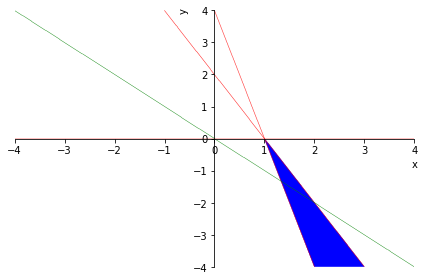

     con: array([], dtype=float64)
     fun: -1.0
 message: 'Optimization terminated successfully.'
     nit: 3
   slack: array([0., 0., 0.])
  status: 0
 success: True
       x: array([1., 0.])

Restricciones:


'Puntos de corte:'

'----------------'

Función a optimizar
max z=360 x + 120 y


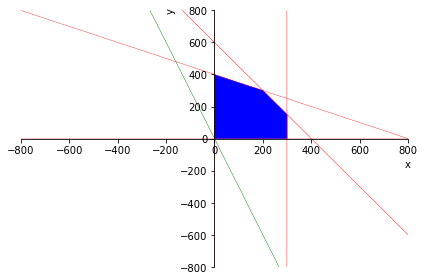

     con: array([], dtype=float64)
     fun: -126000.0
 message: 'Optimization terminated successfully.'
     nit: 4
   slack: array([300., 150., 200.,   0.,   0.])
  status: 0
 success: True
       x: array([300., 150.])

In [4]:
#p19.e1

prob = [
    [[r'2x + y \leq 2 ',r' 4x + y \geq 4',r'y \leq 0'],x+y,'max'],
        [[r'x \geq 0 ', r'y \geq 0 ',r' x + 2y \leq 800',r'3x+2y \leq 1200',r'7x \leq 2100'],360*x+120*y,'max']
       ]

for p in prob :
    sist_latex, funcion, tipo = p
    display(sol_prog_lineal(sist_latex, funcion, tipo))

    
    
    


Restricciones:


'Puntos de corte:'

'----------------'

Función a optimizar
max z=400 x + 500 y


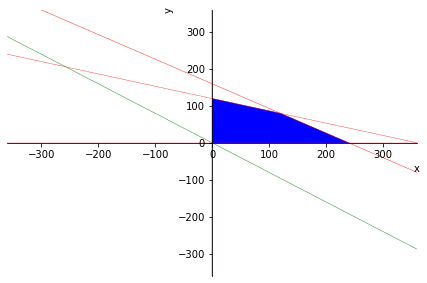

     con: array([], dtype=float64)
     fun: -96000.0
 message: 'Optimization terminated successfully.'
     nit: 3
   slack: array([  0., 120.,   0., 240.])
  status: 0
 success: True
       x: array([240.,   0.])

Restricciones:


'Puntos de corte:'

'----------------'

Función a optimizar
max z=50 x + 60 y


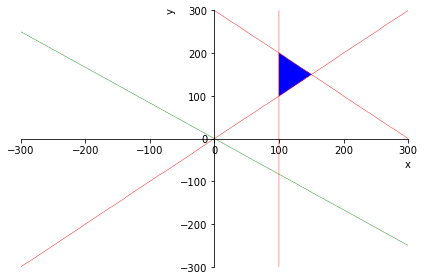

     con: array([], dtype=float64)
     fun: -17000.0
 message: 'Optimization terminated successfully.'
     nit: 3
   slack: array([  0., 100.,   0.])
  status: 0
 success: True
       x: array([100., 200.])

Restricciones:


'Puntos de corte:'

'----------------'

Función a optimizar
max z=750 x + 1000 y


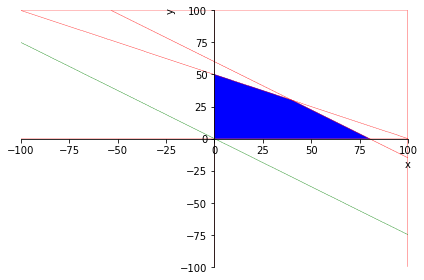

     con: array([], dtype=float64)
     fun: -60000.0
 message: 'Optimization terminated successfully.'
     nit: 4
   slack: array([ 0.,  0., 30., 40., 70., 60.])
  status: 0
 success: True
       x: array([40., 30.])

Restricciones:


'Puntos de corte:'

'----------------'

Función a optimizar
min z=6 x + 9 y


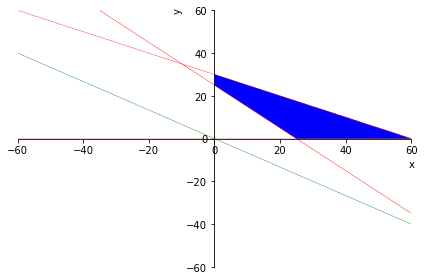

     con: array([], dtype=float64)
     fun: 150.0
 message: 'Optimization terminated successfully.'
     nit: 4
   slack: array([  0., 700.,   0.,  25.])
  status: 0
 success: True
       x: array([25.,  0.])

Restricciones:


'Puntos de corte:'

'----------------'

Función a optimizar
max z=5 x + 6 y


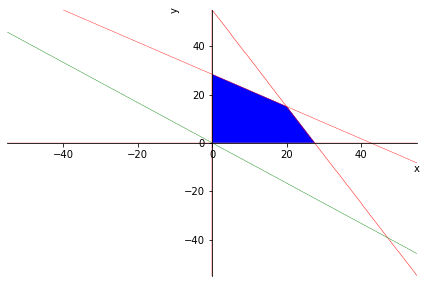

     con: array([], dtype=float64)
     fun: -190.0
 message: 'Optimization terminated successfully.'
     nit: 2
   slack: array([ 0.,  0., 15., 20.])
  status: 0
 success: True
       x: array([20., 15.])

In [5]:
#p19.e9a34

prob = [
    [[r'2x + 3y \leq 480 ',r'x + 3y \leq 360',r'y \geq 0',r'x \geq 0'],400*x+500*y,'max'],
    [[r'x + y \leq 300 ',r'y \geq x',r'x \geq 100'],50*x+60*y,'max'],
    [[r'100x + 200y \leq 10000 ',r'30x + 40y \leq 2400 ', r'y \geq 0',r'x \geq 0',r'y \leq 100',r'x \leq 100'],1000*y+750*x,'max'],
    [[r'x + y \geq 25 ',r'20x + 40y \leq 1200',r'y \geq 0',r'x \geq 0'],6*x+9*y,'min'],
    [[r'4x + 2y \leq 110 ',r'2x + 3y \leq 85',r'y \geq 0',r'x \geq 0'],5*x+6*y,'max'],
    # hasta el 13 hechos
        
       ]

for p in prob :
    sist_latex, funcion, tipo = p
    display(sol_prog_lineal(sist_latex, funcion, tipo))

In [4]:
from scipy import optimize
import scipy
scipy.__version__

'1.5.2'

In [17]:
# Ejemplo de uso de optimización con scipy

from scipy import optimize

"""
    minimizar z=-30x-50y es lo mismo que maximizar z=300x+500y y cambiar el signo
    s.a:
        x+y<=10 <-> -x-y>=-10
        x+3y<=20
        
    Por tanto hay que traducir el problema a minimizar y todas las restricciones a <= 
    
"""

sol = optimize.linprog(
    c = [-30, -50], 
    A_ub=[[1, 1],[1,3]], 
    b_ub=[10,20],
    method='simplex'
)

pprint(-(sol["fun"]))

400.0
